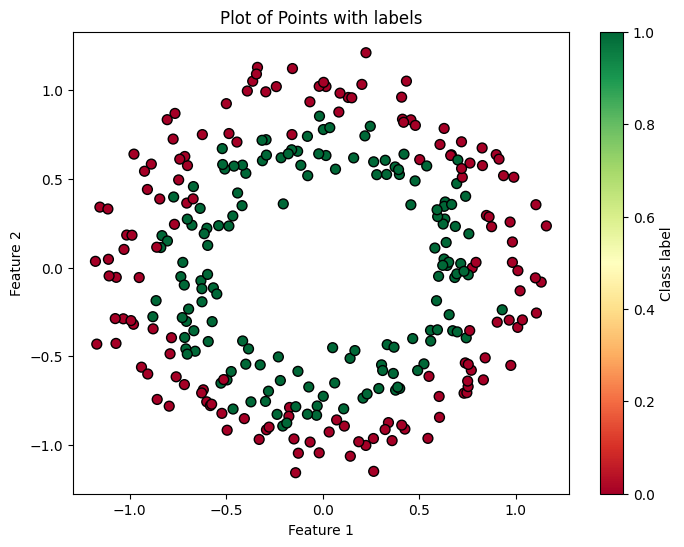

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

#Generate synthetic data (circles)
X, y = make_circles(n_samples=300, random_state=0, noise=0.1, factor=0.7)

#Plot points with their labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of Points with labels')
plt.colorbar(label='Class label')
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

def update_plot(hidden_layer_size):
  #Generate synthetic data (circles)
  #X, y = make_circles(n_samples=300, random_state=0, noise=0.1, factor=0.7)

  clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='relu', max_iter=3000,random_state=1)
  clf.fit(X, y)

  x_vals = np.linspace(X[:,0].min() - 0.1, X[:,0].max() + 0.1, 100)
  y_vals = np.linspace(X[:,1].min() - 0.1, X[:,1].max() + 0.1, 100)

  X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

  grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

  Z = clf.predict(grid_points)
  Z = Z.reshape(X_plane.shape)

  y_pred = clf.predict(X)

  plt.clf()
  plt.contourf(X_plane, Y_plane, Z, levels=[-0.5,0.5,1.5], cmap=plt.cm.RdYlGn, alpha=0.6)

  class_0 = y_pred == 0
  class_1 = y_pred == 1

  plt.scatter(X[class_0, 0], X[class_0, 1], c='red', marker='o', edgecolors='k', s=50, label='Class 0')
  plt.scatter(X[class_1, 0], X[class_1, 1], c='green', marker='o', edgecolors='k', s=50, label='Class 1')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(f'Plot of Points with labels (Hidden Size={hidden_layer_size})')
  plt.legend()
  plt.show()

hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Hidden Layer Size:')


interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

#Display the widgets
display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Hidden Layer Size:', max=10, min=1), Output()), _dom_cla…